In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""
from __future__ import division

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")

#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node_0 = flights.Source[0] #Initiate the first infected node
flights = flights.sort_values("StartTime")
start_time = flights.StartTime.min() #First infected time
end_time = flights.EndTime.max()


infection = infection_model(network, 1 ,flights, start_node_0)
infection_times = infection.InfectionTime

print("Anchorage infection time: ",infection.InfectionTime[41])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Anchorage infection time:  1229290800.0


In [7]:
n_repeat = 50
n = len(network)
time = np.zeros((len(network),n_repeat), dtype=float)
for i in range(n_repeat):
    start_node = np.random.randint(0,n) 
    infection_i = infection_model(network, 0.5 ,flights, start_node)
    time[:,i] = infection_i.InfectionTime
time_median = np.average(time,axis = 1)
print(time_median)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[1.22934530e+09 1.22932521e+09 1.22932105e+09 1.22930904e+09
 1.22930126e+09 1.22932002e+09 1.22936523e+09 1.22930792e+09
 1.22932488e+09 1.22935042e+09 1.22932082e+09 1.22932822e+09
 1.22931200e+09 1.22933671e+09 1.22932921e+09 1.22931799e+09
 1.22932187e+09 1.22935234e+09 1.22935590e+09 1.22932365e+09
 1.22931851e+09 1.22932141e+09 1.22932616e+09 1.22932640e+09
 1.22932007e+09 1.22932314e+09 1.22932315e+09 1.22931833e+09
 1.22932420e+09 1.22932911e+09 1.22933256e+09 1.22931484e+09
 1.22932341e+09 1.22932438e+09 1.22931922e+09 1.22939741e+09
 1.22937235e+09 1.22934065e+09 1.22932641e+09 1.22936051e+09
            inf 1.22934372e+09 1.22942913e+09 1.22936787e+09
 1.22937289e+09 1.22934185e+09 1.22932981e+09 1.22931863e+09
 1.22931924e+09 1.22932267e+09 1.22932239e+09 1.22937839e+09
 1.22943158e+09 1.22939513e+09 1.22947994e+09 1.22935031e+09
 1.22935842e+09 1.22942328e+09 1.22943234e+09 1.22944764e+09
 1.22936094e+09 1.22933900e+09 1.22933619e+09 1.22932883e+09
 1.22933049e+09 1.229327

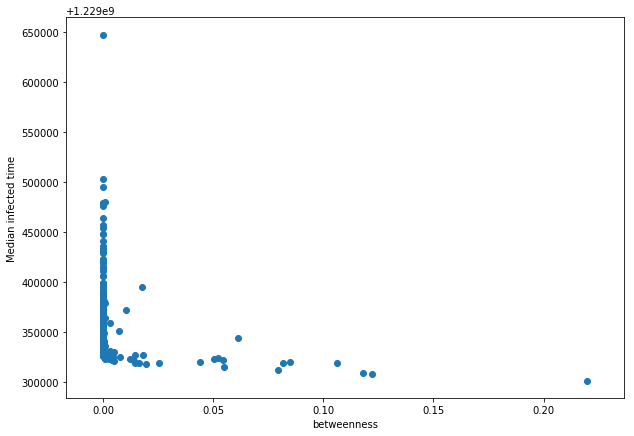

Spearman coef betweenness : SpearmanrResult(correlation=-0.6909227025735164, pvalue=6.436134753851157e-41)


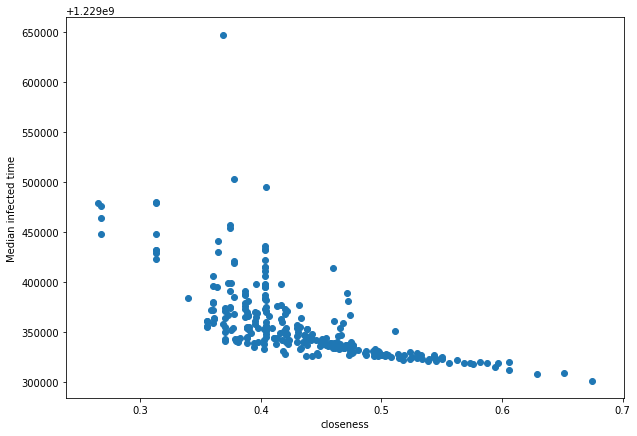

Spearman coef closeness : SpearmanrResult(correlation=-0.8084822680783362, pvalue=9.903441584819336e-66)


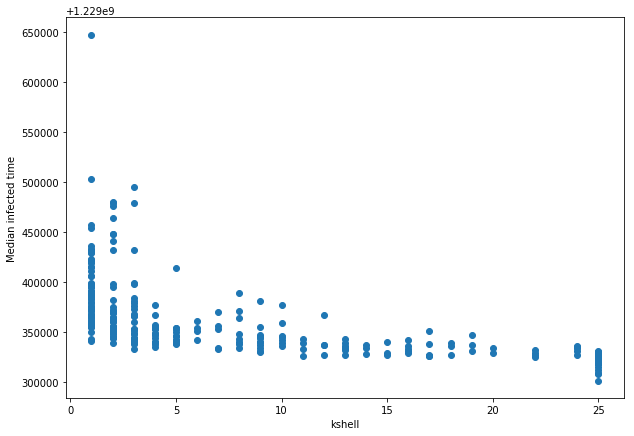

Spearman coef kshell : SpearmanrResult(correlation=-0.8487342657201957, pvalue=1.279731242126974e-78)


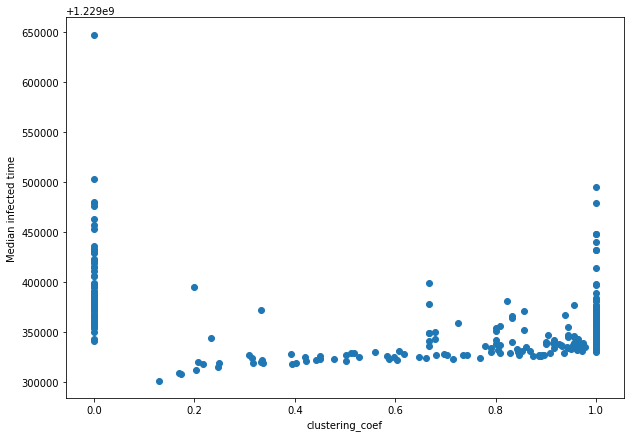

Spearman coef clustering_coef : SpearmanrResult(correlation=-0.10963533105216866, pvalue=0.06746475174099659)


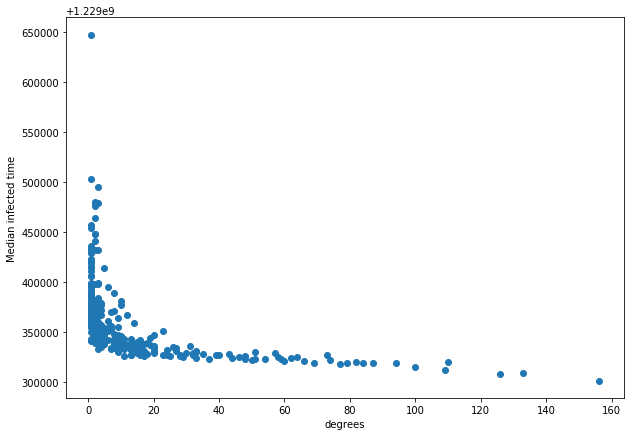

Spearman coef degrees : SpearmanrResult(correlation=-0.8459500161320094, pvalue=1.3030106210844967e-77)


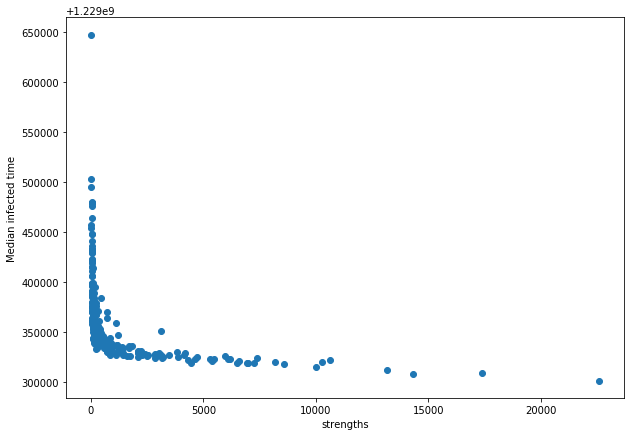

Spearman coef strengths : SpearmanrResult(correlation=-0.9172849437030873, pvalue=9.017301890878925e-113)


In [8]:
#Task 4 cont
from scipy import stats

betweenness = nx.betweenness_centrality(network)
closeness = nx.closeness_centrality(network)
kshell = nx.core_number(network)
clustering_coef = nx.clustering(network)   
degrees = nx.degree(network)
strengths = nx.degree(network, weight = "weight")

betweeness_vec = []
closeness_vec = []
kshell_vec = []
clustering_coef_vec = []
degree_vec = []
strength_vec = []
timemedian_vec = []
for node in network.nodes():
    betweeness_vec.append(betweenness[node])
    closeness_vec.append(closeness[node])
    kshell_vec.append(kshell[node])
    clustering_coef_vec.append(clustering_coef[node])
    degree_vec.append(degrees[node])
    strength_vec.append(strengths[node])
    timemedian_vec.append(time_median[node])

                   
y_values = [betweeness_vec, closeness_vec, kshell_vec, clustering_coef_vec, degree_vec, strength_vec]
y_labels = ["betweenness", "closeness", "kshell", "clustering_coef", "degrees", "strengths"]


for y_val, label in zip(y_values, y_labels):
    fig = plt.figure(figsize=(10,7))
    plt.scatter(y_val, timemedian_vec)
    plt.xlabel(label)
    plt.ylabel("Median infected time")
    plt.show()
    spearman = stats.spearmanr(y_val, timemedian_vec)
    print("Spearman coef " + label + " :", spearman)


In [50]:
import random
random.seed(100)
def infection_model_immunize(network, p, flights, start_node, immunized_node):
    
    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    print(infection.shape)
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = flights.StartTime.min()
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]) and (source not in immunized_node):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection

In [38]:
#Immunized node:
im_random = []
im_kshell = sorted(kshell, key=kshell.get, reverse=True)[0:9]
im_cluster = sorted(clustering_coef, key=clustering_coef.get, reverse=True)[0:9]
im_degree = []
im_strength = []
im_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)[0:9]
im_closeness = sorted(closeness, key=closeness.get, reverse=True)[0:9]

for i in range(10):
    random = np.random.randint(len(network))
    im_random.append(random)

for u,v in sorted(degrees, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_degree.append(u)

for u,v in sorted(strengths, key = lambda tup: tup[1], reverse = True)[0:9]:
    im_strength.append(u)

im_total = im_random + im_kshell + im_cluster + im_degree + im_strength + im_betweenness + im_closeness
print(im_total)


[225, 25, 237, 41, 220, 211, 186, 139, 135, 10, 1, 2, 3, 4, 5, 10, 12, 15, 16, 0, 264, 148, 163, 143, 118, 127, 60, 67, 4, 3, 7, 5, 12, 31, 34, 27, 48, 4, 3, 7, 12, 16, 24, 31, 15, 5, 4, 7, 3, 27, 5, 34, 12, 41, 31, 4, 3, 7, 5, 12, 34, 31, 27, 24]


In [41]:
#Random start node 
j = 0
start_list = []
while j < 20:
    random = np.random.randint(len(network))
    if random not in im_total:
        start_list.append(random)
        j+=1
print(start_list)

[265, 201, 9, 45, 159, 201, 98, 32, 156, 29, 152, 8, 136, 165, 188, 113, 142, 86, 238, 181]


In [ ]:
def immunize_strategy(start_node, immunize_node):
    n = len(network)
    time = np.zeros((len(network),len(start_node)), dtype=float)
    for i in start_node:
        infection_i = infection_model_immunize(network, 0.5 ,flights, start_node, immunize_node)
        print(infection_i.InfectionTime)
        time[:,i] = infection_i.InfectionTime
    time_median = np.average(time,axis = 1)
    return time_median



In [ ]:
time_random = immunize_strategy(start_list, im_random)
time_kshell = immunize_strategy(start_list, im_kshell)
time_cluster = immunize_strategy(start_list, im_cluster)
time_degree = immunize_strategy(start_list, im_degree)
time_strength = immunize_strategy(start_list, im_strength)
time_betweenness = immunize_strategy(start_list, im_betweenness)
time_closeness = immunize_strategy(start_list, im_closeness)


In [ ]:
stepsize = 50    
t = np.linspace(start, end, stepsize)  #To increase this stepsize
for j in range (0,stepsize):
        count = (infection_p.InfectionTime < t[j]).sum()
        prob = float(count/len(infection_p))
        p_t[j,k] = prob
p_t = np.zeros((stepsize,10), dtype=float)
plt.plot(t, prevalence, label = label)

